## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.1
Usando seaborn 0.10.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução

#Importando DataFrame
filmes = pd.read_csv('movies.csv')

#Renomeando as colunas
filmes.rename(columns = {'movieId' : 'filmeId', 'title':  'titulo', 'genres' : 'generos'}, inplace = True)

#Configurando a coluna 'filmeId' como indice
filmes.set_index('filmeId', inplace = True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução

#Importando DataFrame
notas = pd.read_csv('ratings.csv')

#Renomeando as colunas
notas.rename(columns = {'userId' : 'usuarioId', 'movieId':  'filmeId', 'rating' : 'nota', 'timestamp' : 'momento'}, 
             inplace = True)

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby('filmeId')['nota'].mean()

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
notas.groupby('filmeId').count()['nota']

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas.groupby('filmeId').count()['nota']
filmes.query('total_de_votos > 49', inplace = True)
filmes.shape

(450, 5)

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 0, 'Nota Média')

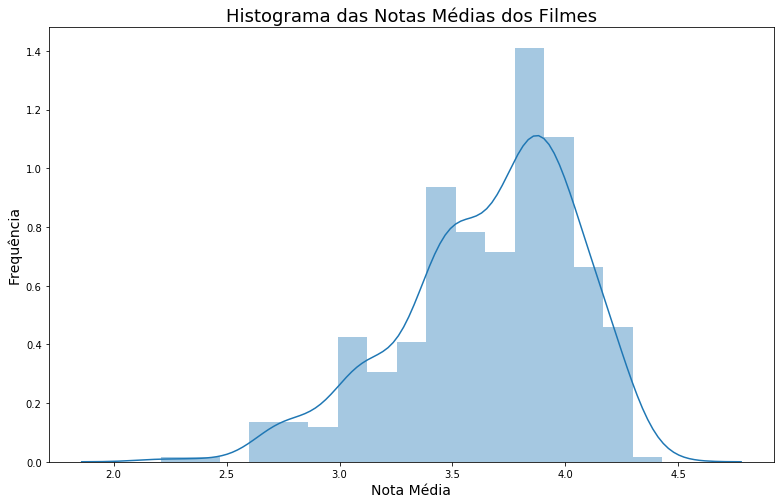

In [14]:
# solução histograma

#Importando o matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Criando os gráficos, seu título e suas legendas
ax = sns.distplot(filmes['nota_media'])
ax.set_title('Histograma das Notas Médias dos Filmes',fontsize=18)
ax.set_ylabel('Frequência',fontsize=14)
ax.set_xlabel('Nota Média',fontsize=14)

Text(0.5, 0, 'Nota Média')

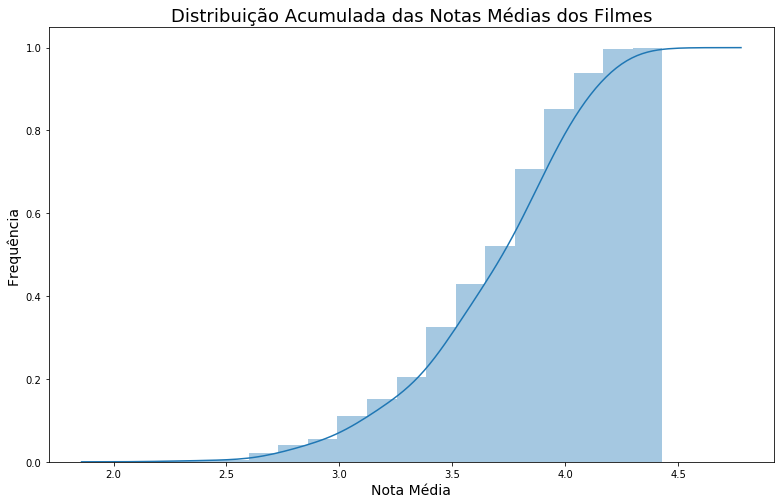

In [15]:
# solução cumulativa

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Criando os gráficos, seu título e suas legendas
ax = sns.distplot(filmes['nota_media'], kde_kws = {'cumulative' : True}, hist_kws = {'cumulative' : True})
ax.set_title('Distribuição Acumulada das Notas Médias dos Filmes',fontsize=18)
ax.set_ylabel('Frequência ',fontsize=14)
ax.set_xlabel('Nota Média',fontsize=14)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 0, 'Total de Votos')

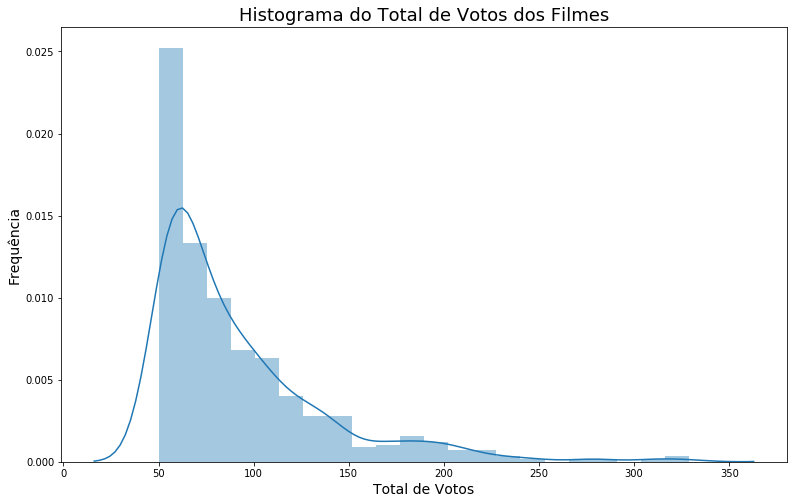

In [16]:
# solução histograma

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Criando os gráficos, seu título e suas legendas
ax = sns.distplot(filmes['total_de_votos'])
ax.set_title('Histograma do Total de Votos dos Filmes',fontsize=18)
ax.set_ylabel('Frequência',fontsize=14)
ax.set_xlabel('Total de Votos',fontsize=14)

Text(0.5, 0, 'Total de Votos')

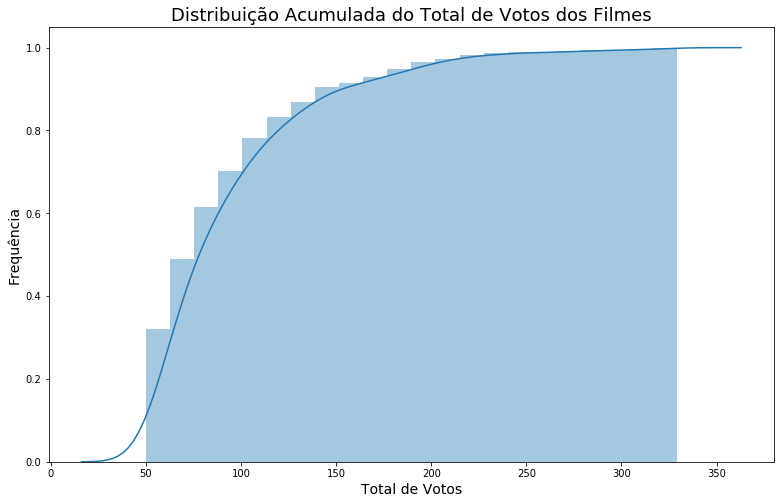

In [17]:
# solução cumulativa

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Criando os gráficos, seu título e suas legendas
ax = sns.distplot(filmes['total_de_votos'], kde_kws = {'cumulative' : True}, hist_kws = {'cumulative' : True})
ax.set_title('Distribuição Acumulada do Total de Votos dos Filmes',fontsize=18)
ax.set_ylabel('Frequência',fontsize=14)
ax.set_xlabel('Total de Votos',fontsize=14)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes["nota_media"].quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Quantidade de Filmes por Gênero')

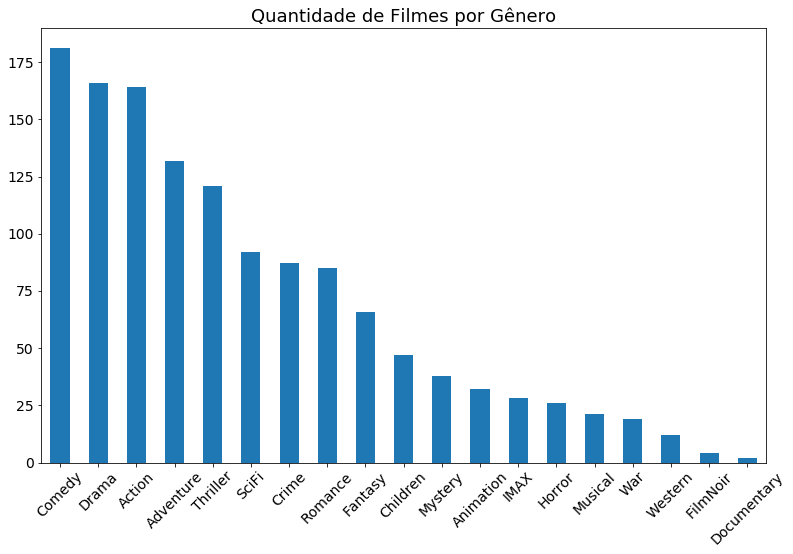

In [22]:
# solução

#Soma de filmes por gênero
filmes_por_genero = generos.sum()

#Ordenando os gêneros de forma decrescente
filmes_por_genero = filmes_por_genero.sort_values(ascending = False) 

#Criação do gráfico
ax = filmes_por_genero.plot(kind='bar', figsize = (13,8), fontsize = 14, rot=45)
ax.set_title('Quantidade de Filmes por Gênero', fontsize=18)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução

#Na criação da Series 'filmes_por_genero' sort_values() já foi utilizada
top5_generos_em_quantidade_de_filmes = filmes_por_genero[:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head(10)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
5,132.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0
6,0.0,0.0,0.0,0.0,70.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,82.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
total_de_votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Quantidade de Votos por Gênero de Filme')

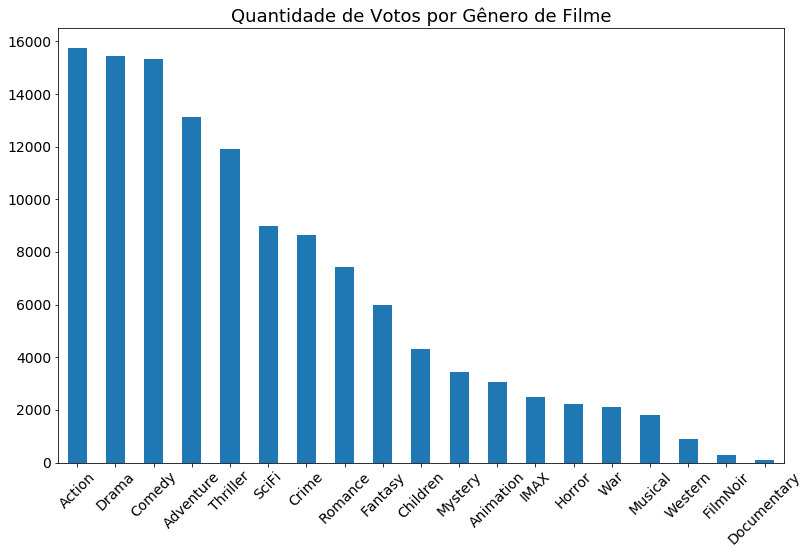

In [27]:
# solução
ax = total_de_votos_por_genero.plot(kind='bar', figsize = (13,8), fontsize = 14, rot=45)
ax.set_title('Quantidade de Votos por Gênero de Filme', fontsize=18)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
'''
As variáveis para o cálculo da popularidade fora recriadas sem o 'sort_values()', para que os indices se mantivessem na mesma ordem.

'''
#Criação das variáveis
total_de_votos = votos_por_genero_por_filme.sum()
total_de_filmes = generos.sum()
#Calculando a 'popularidade'
popularidade = total_de_votos/total_de_filmes
popularidade = popularidade.sort_values(ascending = False)
popularidade

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

Text(0.5, 1.0, 'Popularidade por Gêneros')

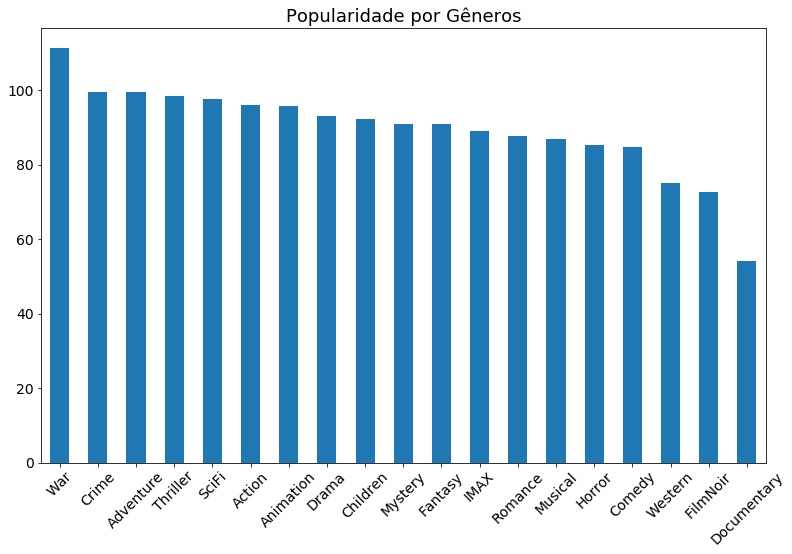

In [29]:
# solução com visualização 
ax = popularidade.plot(kind='bar', figsize = (13,8), fontsize = 14,rot=45)
ax.set_title('Popularidade por Gêneros', fontsize=18)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
   Nomear a métrica de 'popularidade' pode ser enganoso, pois apesar de o gênero 'War' aparecer como mais popular que 'Action' é importante ressaltar que 'Action' é o terceiro gênero com mais filmes e o gênero com o mais avaliações, enquanto o gênero 'War' é o quarto gênero com menos filmes e com menos avaliações. Por chamar de 'popularidade' a métrica que consiste na relação entre a quantidades de avaliações que um gênero recebe e a quantidade de filmes que esse gênero apresenta, a ideia que é passada é de que quanto mais popular o gênero, mais comum ele é (e até mais bem recebido). Porém, na verdade esse métrica melhor reflete o engajamento que um determinado gênero causa na audiência. Apesar de o gênero 'Action' ter 8 vezes mais filmes e 7 vezes mais avaliações, os filmes do gênero 'War' recebe por volta de 12% mais comentários por filme.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, "Boxplot do Total de Votos dos Filmes dos gêneros 'Horror' e 'Adventure'")

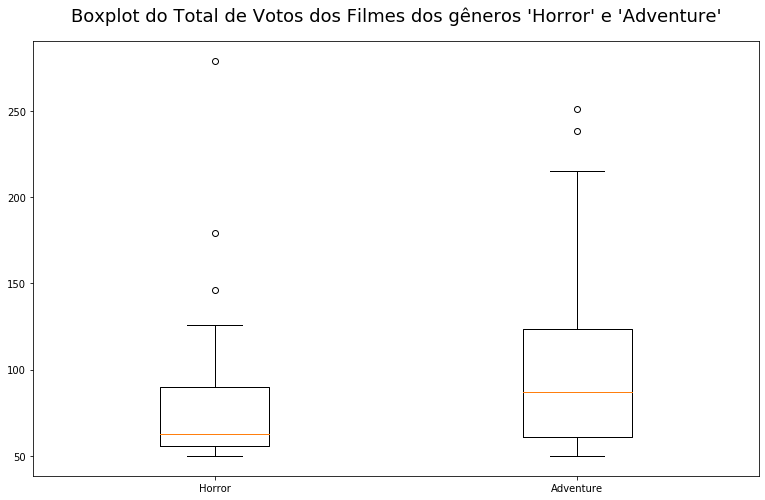

In [30]:
# solução:

#Separando apenas os votos apenas dos filmes de 'Horror'
total_de_votos_horror = filmes.query('Horror == 1')['total_de_votos']

#Separando apenas os votos apenas dos filmes de 'Adventure'
total_de_votos_adventure = filmes.query('Adventure == 1')['total_de_votos']

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Plotando e personalizando os boxplots
ax = plt.boxplot((total_de_votos_horror, total_de_votos_adventure), widths = 0.3, labels = ['Horror', 'Adventure'])
plt.title("Boxplot do Total de Votos dos Filmes dos gêneros 'Horror' e 'Adventure'", fontsize=18, pad=20)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'FilmNoir'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'IMAX'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'SciFi'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Western')]

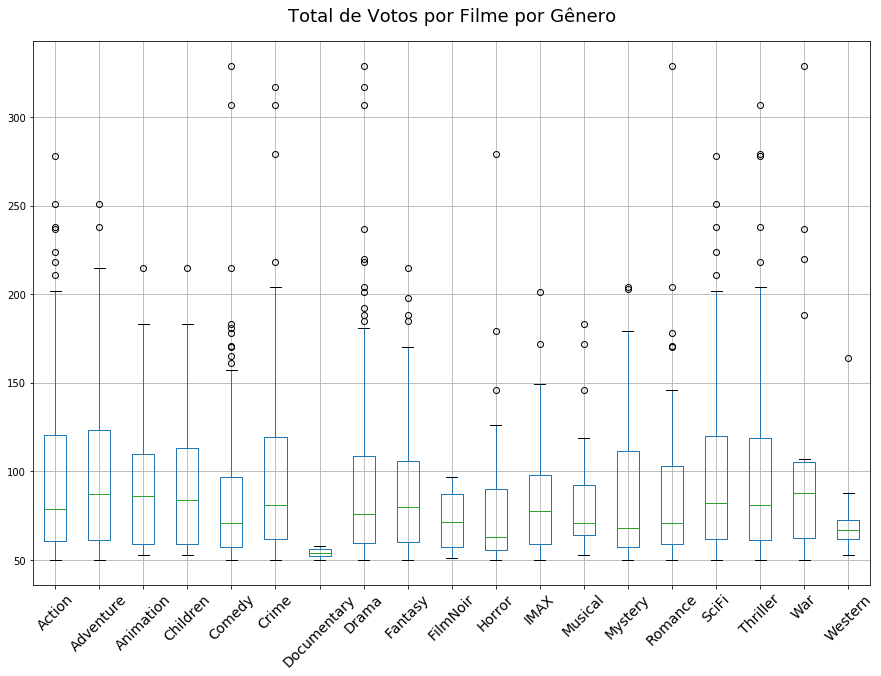

In [31]:
import numpy as np

'''
Como agrega todos os filmes e todos o generos juntos, quando um filmes não pertence a um gênero ele recebe um 0 para a 
quantidade de votos, mas como removemos todos os filmes com menos de 50 votos, sabemos que nenhum de fato recebeu 0 votos.
Para evitar que os 0's afetem o gráfico, os substituí por NaN's, que são ignorados na plotagem.
'''

#Substituindo os 0's por NaN's
votos_por_genero_por_filme = votos_por_genero_por_filme.replace(0, np.NaN)

#Plotando e personalizando o gráfico
ax = votos_por_genero_por_filme.boxplot(figsize = (15,10))
ax.set_title('Total de Votos por Filme por Gênero', fontsize=18, pad=20)
ax.set_xticklabels(labels = generos.columns, rotation = 45, fontsize=14)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
   Os dados visualizados até o momento, são relativos à quantidade de filmes, às notas médias dos filmes, votos por filme e às popularidades dos gêneros. Nenhuma dessas variáveis reflete diretamente a rentabilidade de um filme, porque nenhum delas informa  diretamente nem qual foi o orçamento do filme nem quanto ele arrecadou. Porém, se considerarmos uma boa correlação positiva entre a rentabilidade as variáveis de fato analisamos, eu recomendaria um filme de aventura ('Adventure'), pois são filmes mais bem avaliados, recebem um maior engajamento e são mais populares.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Total de Votos')

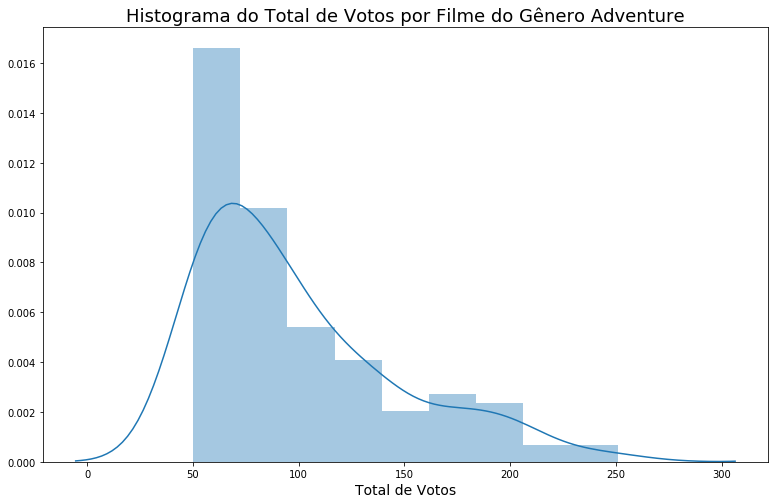

In [32]:
# solucao histograma de aventura

#Separando apenas os votos apenas dos filmes de 'Adventure'
total_de_votos_adventure = filmes.query('Adventure == 1')['total_de_votos']

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Plotando e personalizando o gráfico
ax = sns.distplot(total_de_votos_adventure)
ax.set_title('Histograma do Total de Votos por Filme do Gênero Adventure', fontsize=18)
ax.set_xlabel('Total de Votos', fontsize=14)

Text(0.5, 0, 'Total de Votos')

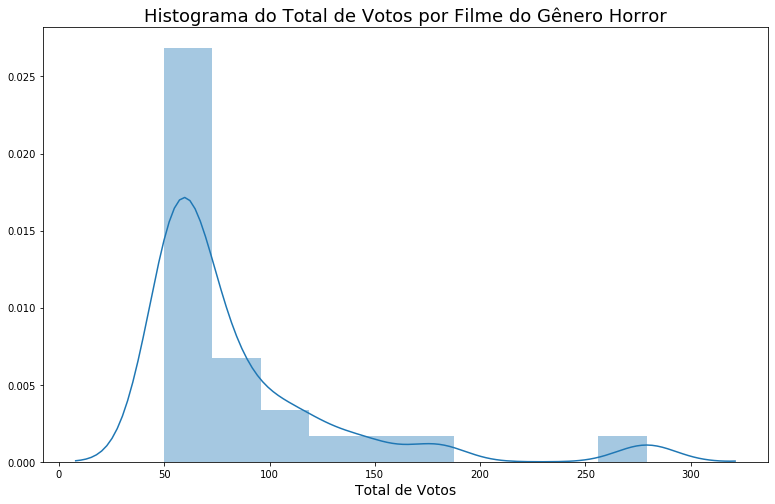

In [33]:
# solucao histograma de horror

#Separando apenas os votos apenas dos filmes de 'Horror'
total_de_votos_horror = filmes.query('Horror == 1')['total_de_votos']

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Plotando e personalizando o gráfico
ax = sns.distplot(total_de_votos_horror)
ax.set_title('Histograma do Total de Votos por Filme do Gênero Horror', fontsize=18)
ax.set_xlabel('Total de Votos', fontsize=14)

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest, ranksums
_, p = normaltest(total_de_votos_horror)
print(f'O p-value é {p:5f}, por ser menor que 0.05, consideramos descartada a hipotese nula, portanto, a distribuição não é normal')

O p-value é 0.000000, por ser menor que 0.05, consideramos descartada a hipotese nula, portanto, a distribuição não é normal


In [35]:
_, p = normaltest(total_de_votos_adventure)
print(f'O p-value é {p:5f}, por ser menor que 0.05, consideramos descartada a hipotese nula, portanto, a distribuição não é normal')

O p-value é 0.000006, por ser menor que 0.05, consideramos descartada a hipotese nula, portanto, a distribuição não é normal


In [36]:
print(f'A categoria Horror tem {total_de_votos_horror.shape[0]} filmes,e a categoria Adventure tem {total_de_votos_adventure.shape[0]} filmes.')

A categoria Horror tem 26 filmes,e a categoria Adventure tem 132 filmes.


### Por terem dimensões drásticamente diferentes e por não serem normais, a melhor forma de comparar as distribuições é com um teste não-paramétrico

In [37]:
# solução com o teste desejado
_, p =ranksums(total_de_votos_horror, total_de_votos_adventure)
print(f'O p-value é {p:5f}, por ser menor que 0.05, consideramos descartada a hipotese nula')

O p-value é 0.047824, por ser menor que 0.05, consideramos descartada a hipotese nula


### Solução (explique sua conclusão): No teste 'ranksums', a hipotese nula é que os dois conjuntos de dados sendo comparadas foram retirados da mesma distribuição. Considerando o resultado do teste obtido, aceitamos a hipotese alternativa, ou seja, concluimos que os valores em uma amostra provavelmente são maiores do que os da outra. Portanto, juntando esse resultado com os motivos citados da recomendação anterior, mantenho a sugestão de que um filme de aventura ('Adventure') seria mais adequado para o resultado desejado.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, "Boxplot das Notas Médias dos Filmes dos Gêneros 'Horror' e 'Adventure'")

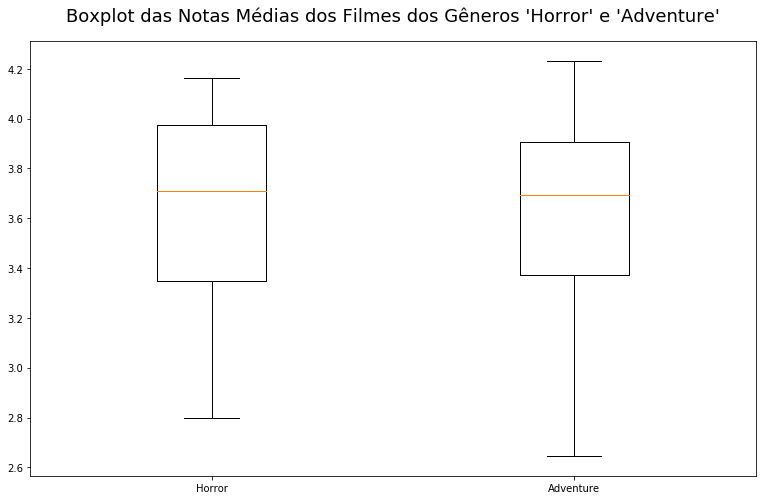

In [38]:
# solução:

#Separando apenas as notas médias apenas dos filmes de 'Horror'
notas_medias_horror = filmes.query('Horror == 1')['nota_media']

#Separando apenas as notas médias apenas dos filmes de 'Adventure'
notas_medias_adventure = filmes.query('Adventure == 1')['nota_media']

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Plotando e personalizando os boxplots
ax = plt.boxplot((notas_medias_horror, notas_medias_adventure), widths = 0.3, labels = ['Horror', 'Adventure'])
plt.title("Boxplot das Notas Médias dos Filmes dos Gêneros 'Horror' e 'Adventure'", fontsize=18, pad=20)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Obervando os boxplots das notas médias de cada gênero, percebemos que ambos os gêneros apresentam gráficos bastante similares, dificultando uma boa recomendação. Porém, se considerarmos um sucesso de críticas um filme com nota igual ou superior a 4.0, podemos observar que apesar de atingir um valor máximo menor, os filmes do gênero de 'Horror' apresentam o seu último quartil praticamente inteiro, com notas iguais ou superiores a 4.0, ou seja aproximadamente 25% dos filmes de 'Horror' são sucessos de crítica. Enquanto isso, apesar de atingir valores mais altos, o ultimo quartil dos filmes do gênero Adventure tem uma porção considerável abaixo dos 4.0, ou seja uma fração bem menor que 25% dos filmes de 'Adventure' são sucessos de crítica. Além disso, é possível observar que o boxplot de 'Adventure' se estende mais para baixo que os boxplot de 'Horror, indicando notas, em geral, mais baixas. Devido a isso, considero a melhor sugestão para obter o resultado esperado, um filme do gênero 'Horror'.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Nota Média')

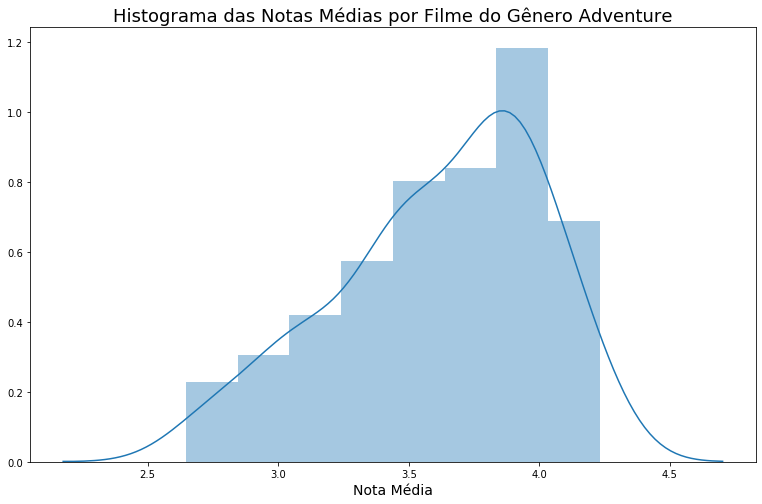

In [41]:
# solucao histograma de aventura

#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Plotando e personalizando o gráfico
ax = sns.distplot(notas_medias_adventure)
ax.set_title('Histograma das Notas Médias por Filme do Gênero Adventure', fontsize=18)
ax.set_xlabel('Nota Média', fontsize=14)

Text(0.5, 0, 'Nota Média')

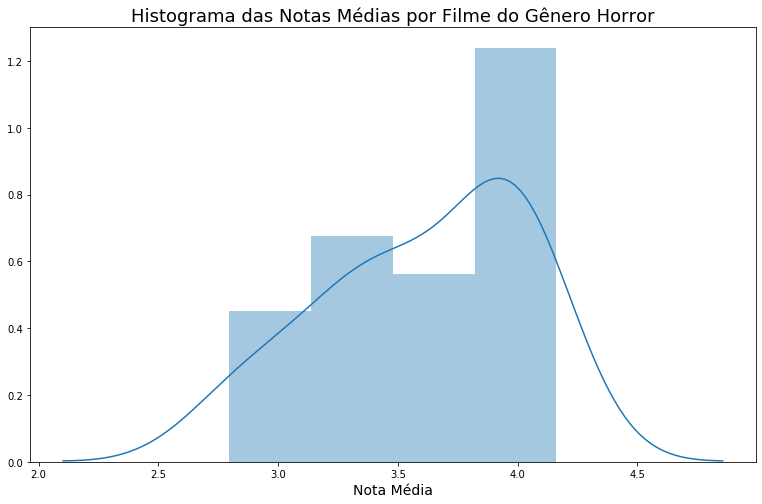

In [42]:
# solucao histograma de horror
#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

#Plotando e personalizando o gráfico
ax = sns.distplot(notas_medias_horror)
ax.set_title('Histograma das Notas Médias por Filme do Gênero Horror', fontsize=18)
ax.set_xlabel('Nota Média', fontsize=14)

In [43]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p = normaltest(notas_medias_horror)
print(f'O p-value é {p:5f}, maior que 0.05, então confirmamos a hipotese nula. A distribuição é normal')

O p-value é 0.211863, maior que 0.05, então confirmamos a hipotese nula. A distribuição é normal


In [44]:
_, p = normaltest(notas_medias_adventure)
print(f'O p-value é {p:5f}, menor que 0.05, então consideramos descartada a hipotese nula. A distribuição não é normal')

O p-value é 0.012836, menor que 0.05, então consideramos descartada a hipotese nula. A distribuição não é normal


In [45]:
print(f'A categoria Horror tem {notas_medias_horror.shape[0]} filmes, e a categoria Adventure tem {notas_medias_adventure.shape[0]} filmes.')

A categoria Horror tem 26 filmes,e a categoria Adventure tem 132 filmes.


In [46]:
# solução com o teste desejado
_, p =ranksums(notas_medias_adventure, notas_medias_horror)
print(f'O p-value é {p:5f}, por ser maior que 0.05, não podemos descartar a hipotese nula')

O p-value é 0.831040, por ser maior que 0.05, não podemos descartar a hipotese nula


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: 
O teste estatístico mostrou que não há diferença estatisticamente significante para considerarmos as duas distribuições diferentes. Dessa maneira, apesar de uma analise puramente visual me levar a sugerir o gênero 'Horror, considerando a análise estatística, acho prudente alterar minha sugestão para 'Adventure', pois, apesar de não apresentarem diferenças significantes, o gênero 'Adventure' apresenta um grupo amostral 5 vezes maior que o do gênero 'Horror'. Isso faz com que as estatisticas relativas ao gênero 'Adventure' muito mais confiáveis.
                           


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: 
As análises que fizemos anteriormente nos dão duas repostas: filmes do gênero 'Adventure' são melhores se você quer que seu filme seja popular e, se você quer que seu filme seja um sucesso de críticas, não há diferenças entre as categorias. Porém, tendo que escolher um gênero para obter os dois resultados, acho que a recomendação ideal seria um filme do gênero de 'Adventure. A razão para isso é que nos dados que estamos analisando, o gênero 'Adventure' tem 132 filmes, enquanto o gênero 'Horror' tem apenas 26. Essa diferença de 5 vezes no espaço amostral, torna as estatísticas do gênero 'Adventure' bem mais confiáveis que as do gênero 'Horror'. Assim, como vimos, o gênero 'Adventure' já é uma opção melhor se você quer um filme popular e, apesar de não haver diferença entre os dois no quesito 'nota_media', sinto-me mais confortável sugerindo o grupo cujas estatísticas são mais confiáveis. Então recomendo um filme do gênero 'Adventure'.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [47]:
# solução: calculando os 2 generos mais votados
total_de_votos = votos_por_genero_por_filme.sum().sort_values(ascending =False)
total_de_votos[:2]

Action    15734.0
Drama     15445.0
dtype: float64

In [48]:
# solução: encontrando os top 5 filmes desses generos
top_5_action = filmes.query('Action == 1')[['titulo', 'nota_media']].sort_values('nota_media',ascending = False).head()
top_5_action

,titulo,nota_media
filmeId,,
2959,Fight Club (1999),4.272936
58559,"Dark Knight, The (2008)",4.238255
1197,"Princess Bride, The (1987)",4.232394
260,Star Wars: Episode IV - A New Hope (1977),4.231076
1208,Apocalypse Now (1979),4.219626


In [49]:
top_5_drama = filmes.query('Drama == 1')[['titulo', 'nota_media']].sort_values('nota_media',ascending = False).head()
top_5_drama

,titulo,nota_media
filmeId,,
318,"Shawshank Redemption, The (1994)",4.429022
858,"Godfather, The (1972)",4.289062
2959,Fight Club (1999),4.272936
1276,Cool Hand Luke (1967),4.271930
1221,"Godfather: Part II, The (1974)",4.259690


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [50]:
# solucao
filmes.corr()['nota_media'].sort_values(ascending=False)

nota_media           1.000000
total_de_votos       0.342584
Drama                0.277662
Crime                0.190220
Mystery              0.129914
War                  0.125615
FilmNoir             0.081766
IMAX                 0.064931
Animation            0.043071
Documentary         -0.003486
Musical             -0.008529
Thriller            -0.016782
Fantasy             -0.020986
Children            -0.030360
Horror              -0.033877
Western             -0.059642
Romance             -0.072002
Adventure           -0.079985
SciFi               -0.136717
Action              -0.154089
ano_de_lancamento   -0.159146
Comedy              -0.256005
Name: nota_media, dtype: float64

## O índice de correlação é um valor que varia entre -1 e 1, sendo -1 uma correlação negativa perfeita e 1 uma correlação positiva perfeita. Nessa escala, 0 representa uma total falta de correlação. Considerando isso, os gêneros com as duas maiores correlações com a variável 'nota_media' são 'Drama', com 0.277 de correlação (positiva) e 'Comedy', com -0.256 de correlação (negativa). Os gêneros com as duas menores correlações com a variável 'nota_media' são 'Documentary' com -0.003 de correlação (negativa) e 'Musical' com -0.008 de correlação (negativa).

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [51]:
# solucao
filmes.corr()['total_de_votos'].sort_values(ascending=False)

total_de_votos       1.000000
nota_media           0.342584
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

## O índice de correlação é um valor que varia entre -1 e 1, sendo -1 uma correlação negativa perfeita e 1 uma correlação positiva perfeita. Nessa escala, 0 representa uma total falta de correlação. Considerando isso, os gêneros com as duas maiores correlações com a variável 'total_de_votos' são 'Comedy', com -0.128 de correlação (negativa) e 'Adventure', com 0.104 de correlação (positiva). Os gêneros com as duas menores correlações com a variável 'total_de_votos' são 'Children' com 0.001 de correlação (positiva) e 'Mystery' com -0.007 de correlação (negativa).

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

[Text(0, 0.5, 'Nota Média'), Text(0.5, 0, 'Ano de Lançamento')]

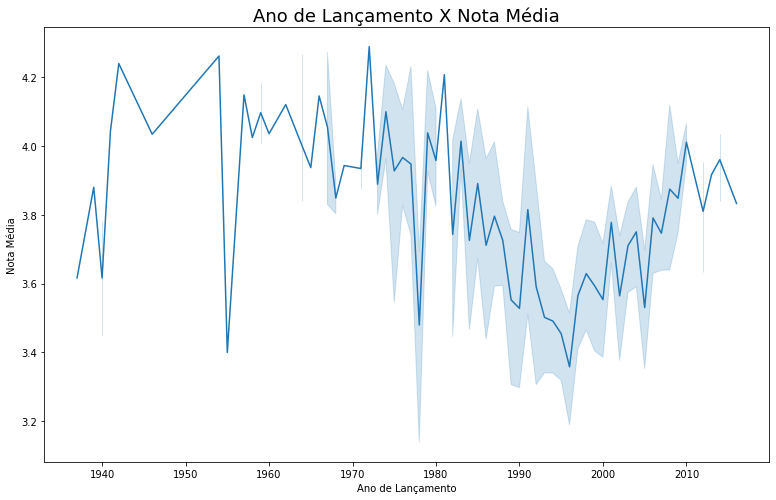

In [52]:
# solucao
#Determinando o tamanho dos gráficos
plt.figure(figsize= (13, 8))

ax = sns.lineplot(x ='ano_de_lancamento', y = 'nota_media', data = filmes)
ax.set_title('Ano de Lançamento X Nota Média', fontsize=18)
ax.set(xlabel= 'Ano de Lançamento', ylabel= 'Nota Média')

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [53]:
# solução (código)
filmes.corr()['ano_de_lancamento']

ano_de_lancamento    1.000000
nota_media          -0.159146
total_de_votos      -0.028709
Action               0.140392
Adventure            0.114268
Animation           -0.052874
Children            -0.149019
Comedy               0.019272
Crime                0.060993
Documentary          0.047746
Drama                0.028411
Fantasy             -0.076776
FilmNoir             0.002235
Horror              -0.026873
IMAX                 0.248002
Musical             -0.296174
Mystery              0.005591
Romance             -0.024589
SciFi                0.069839
Thriller             0.104458
War                  0.026118
Western             -0.062539
Name: ano_de_lancamento, dtype: float64

### Solução (explicação)

   As variáveis em consideração, apresentam uma baixa correlação negativa, -0.159. Dessa forma, quanto mais recente o filme (quanto maior o ano de lançamento) pior a nota média, e vice-versa. Porém, como foi colocado no enunciado da pergunta, correlação e causalidade são dois conceitos distintos. Só por vermos uma correlação entre o ano de lançamento e a nota média, não significa que necessáriamente o ano de lançamento tenha um impacto direto na nota média do filme.
   
   Uma possível explicação para essa correlação é que bases de dados como o MovieLens são relativamente recentes, se comparadas com a indústria do cinema. Como podemos ver no gráfico acima, temos na base de dados filmes de antes de 1940. Esse aspecto tem duas consequêcias. A primeira é que quanto mais antigo o filme, menos pessoas terão visto ele. Hoje em dia a parcela de pessoas que assistiu um filme lançado antes de 1940 é muito pequena. A segunda é, que a medida que o tempo passa, os filmes de pior qualidade vão sendo esquecidos e os filmes mais populares vão sendo lembrados. Então, ao construir uma base de dados como essa, os filmes mais antigos adicionados provavelmente vão ser os mais clássicos.
    
   Considerando a combinação desses fatores, é de se esperar que haja uma leve correlação negativa entre o ano de lançamento e a nota média, mesmo que não haja uma relação de causa e efeito entre as duas variáveis.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

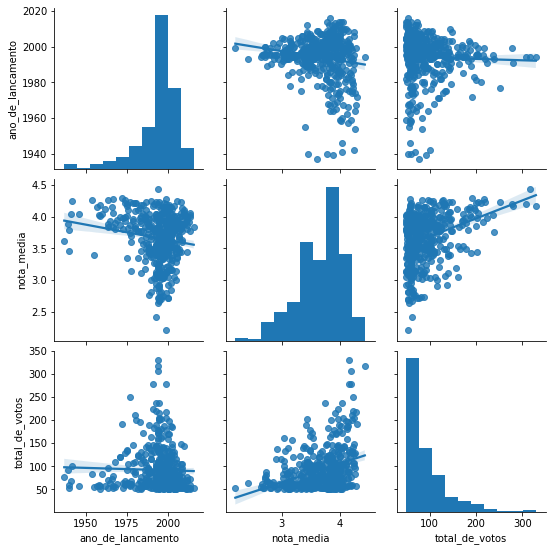

In [54]:
# solução
infos  = filmes[['ano_de_lancamento', 'nota_media' , 'total_de_votos']]
ax = sns.pairplot(infos, kind = 'reg')
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

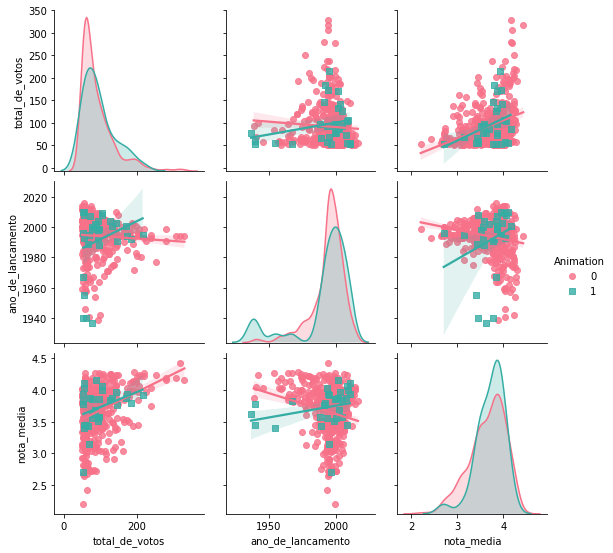

In [55]:
ax = sns.pairplot(filmes, hue='Animation', x_vars = ['total_de_votos', 'ano_de_lancamento', 'nota_media'], 
             y_vars = ['total_de_votos', 'ano_de_lancamento', 'nota_media'], markers = ['o', 's'],
             palette = 'husl',  kind = 'reg')
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
   Os filmes do gênero 'Animation', comparando o ano de lançamento com a a nota média e com o total de votos, apresenta uma leve correlação positiva nas duas comparações, enquanto o agregado dos outros gêneros apresenta uma leve correlação negativa para ambas as comparações. Nos ultimos 20 anos, a tecnologia disponível para a produção de filmes de animação se tornou cada vez mais avançada, dessa maneira, filmes de animação tem se tornado cada vez melhores e mais populares, o que explica muito bem a correlação positiva entre o ano de lançamento se comparado com a nota média e com o total da votos.
    
   Para explicar a correlação negativa dos outros gêneros nessas mesmas comparações, uma hipótese razoável pode ser também o avanço das tecnologias envolvidas na produção cinematógrafica, pois com esse avanço, há uma redução nos custos envolidos na produção de um filme. Por isso, há um grande aumento na produção de filmes independentes e de menor visibilidade e/ou menor qualidade. Isso faz com que haja muitos filmes com pouco público e menor qualidade, explicando a correlação negativa se compararmos o ano de lançamento com o total de votos e com a nota média.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

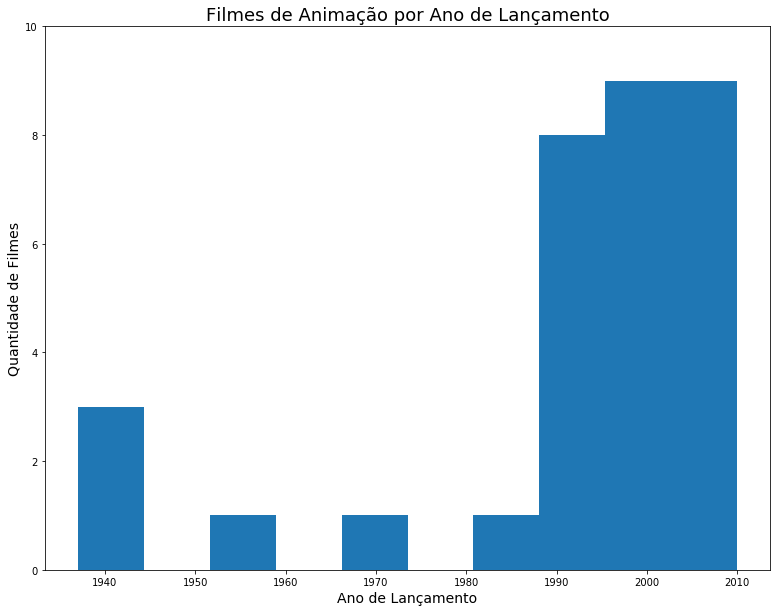

In [56]:
#Selecionando apenas os filmes do gênero 'Animation'
animation = filmes.query('Animation == 1')

#Plotando e personalizando o gráfico
ax = animation['ano_de_lancamento'].plot(kind='hist', figsize=(13,10), ylim=(0,10))
ax.set_title('Filmes de Animação por Ano de Lançamento', fontsize=18)
ax.set_xlabel('Ano de Lançamento', fontsize=14)
ax.set_ylabel('Quantidade de Filmes', fontsize=14)
ax

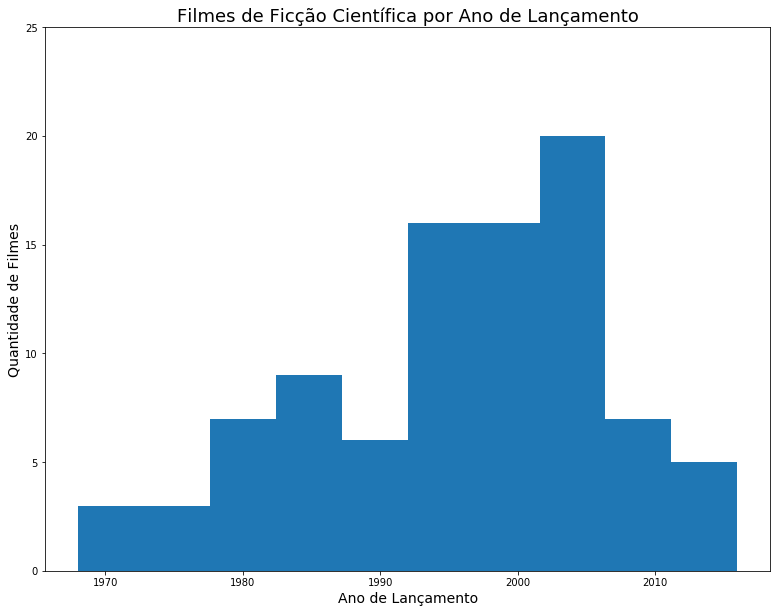

In [57]:
#Selecionando apenas os filmes do gênero 'SciFi'
scifi = filmes.query('SciFi == 1')
scifi['ano_de_lancamento'].unique().shape

#Plotando e personalizando o gráfico
ax = scifi['ano_de_lancamento'].plot(kind='hist', figsize=(13,10), ylim=(0,25))
ax.set_title('Filmes de Ficção Científica por Ano de Lançamento', fontsize=18)
ax.set_xlabel('Ano de Lançamento', fontsize=14)
ax.set_ylabel('Quantidade de Filmes', fontsize=14)
ax

### Solução:

Baseado na ultima análise, decidi isolar apenas os filmes do gênero 'Animation', como podemos ver, ao entrar na década de 90, a quantidade de filmes de 'Animação' aumenta consideravelmente, indo de 1 filme por ano até mais de 8. De fato, em 1995 estreou Toy Story, que é considerado um marco nos filmes de animação e após seu lançamento, houve um grande aumento na produção de filmes de animação. Desde de então as tecnologia envolvidas só melhoraram e se tornaram mais acessiveis,tornando os filmes de animação mais bem produzidos e cada vez mais populares.

Para expandir nessa linha de pensamento, fiz o mesmo gráfico para filmes de ficção científica, outro gênero cinematográfico amplamente beneficiado pelos avanços tecnológicos. Como foi possível observar, os filmes de ficção científica tiveram dois momentos de grande crescimento. O primeiro foi da década de 70 para a década de 80. De fato, em 1977 foi lançado o primeiro filme da saga Star Wars, cujo lançamento precedeu um boom na produção de filmes de ficção científica, nos anos seguintes, como podemos observar, a quantidade de filmes quase dobrou de uma década para a seguinte. Depois disso, novamente na década de 90 a quantidade de filmes do gênero chega a dobrar, já que a década foi marcada pelos avanços tencnológicos.

Apesar de interessantes, essas visualizações são limitadas, pois a base de dados utilizada, apresenta uma quantidade reduzida de filmes (9 mil filmes), que diminuiu mais ainda a medida que fomos refinando nossos dados. O próprio movie lens é capaz de fornecer bases de dados mais compreensivas, com até 58 mil filmes. Com uma quantidade consideravelmente maior de observações, poderíamo visualizar essas tendencias de maneira bem mais definida e detalhada, e provavelmente observar muitas outras tendencias.